In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
bins = {}
dologx = [False,False,False,True]
dology = [True,False,True,True]

#jet pt
bins[0] = np.logspace(np.log10(10),np.log10(100),7)

#jet eta
bins[1] = np.linspace(-1,2.5,6)

#dphi
bins[2] = np.logspace(np.log10(0.03),np.log10(np.pi/2.0),9) - 0.03
bins[2] = bins[2][1:]
bins[2][0] = 0.0

#qt
bins[3] = np.logspace(np.log10(0.03),np.log10(3.03),9) - 0.03
bins[3] = bins[3][1:]
bins[3][0] = 0.0

on bootstrap =  1
on bootstrap =  2
on bootstrap =  3
on bootstrap =  4
on bootstrap =  5
on bootstrap =  6
on bootstrap =  7
on bootstrap =  8
on bootstrap =  9
on bootstrap =  10
on bootstrap =  11
on bootstrap =  12
on bootstrap =  13
on bootstrap =  14
on bootstrap =  15
on bootstrap =  16
on bootstrap =  17
on bootstrap =  18
on bootstrap =  19
on bootstrap =  20
on bootstrap =  21


<ipython-input-38-c18fe6851167>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig , ax = plt.subplots(2,2,figsize=(8,8))


on bootstrap =  22
on bootstrap =  23
on bootstrap =  24
on bootstrap =  25
on bootstrap =  26
on bootstrap =  27
on bootstrap =  28
on bootstrap =  29
on bootstrap =  30
on bootstrap =  31
on bootstrap =  32
on bootstrap =  33
on bootstrap =  34
on bootstrap =  35
on bootstrap =  36
on bootstrap =  37
on bootstrap =  38
on bootstrap =  39
on bootstrap =  40
on bootstrap =  41
on bootstrap =  42
on bootstrap =  43
on bootstrap =  44
on bootstrap =  45
on bootstrap =  46
on bootstrap =  47
on bootstrap =  48
on bootstrap =  49
on bootstrap =  50
on bootstrap =  51
on bootstrap =  52
on bootstrap =  53
on bootstrap =  54
on bootstrap =  55
on bootstrap =  56
on bootstrap =  57
on bootstrap =  58
on bootstrap =  59
on bootstrap =  60
on bootstrap =  61
on bootstrap =  62
on bootstrap =  63
on bootstrap =  64
on bootstrap =  65
on bootstrap =  66
on bootstrap =  67
on bootstrap =  68
on bootstrap =  69
on bootstrap =  70
on bootstrap =  71
on bootstrap =  72
on bootstrap =  73
on bootstrap

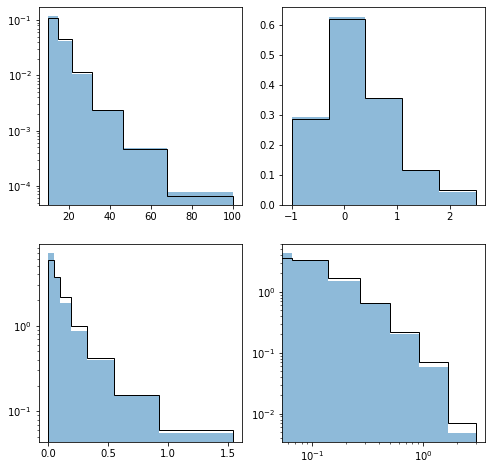

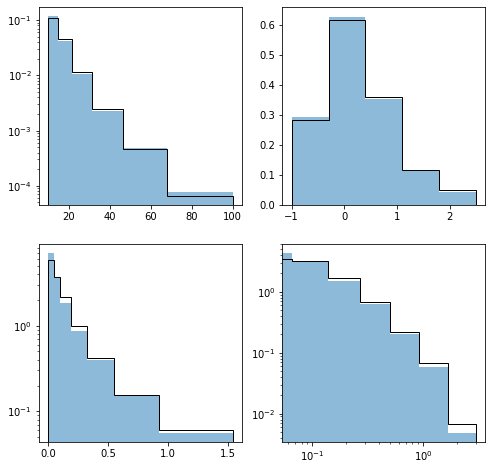

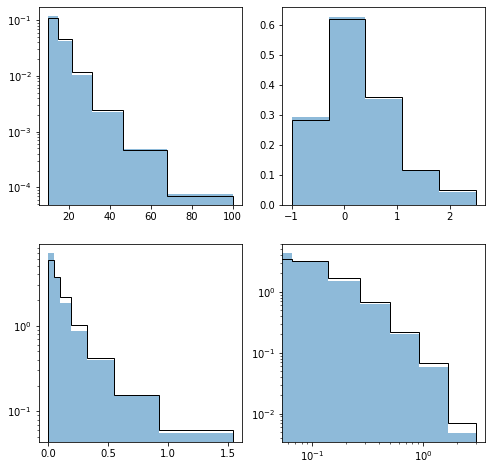

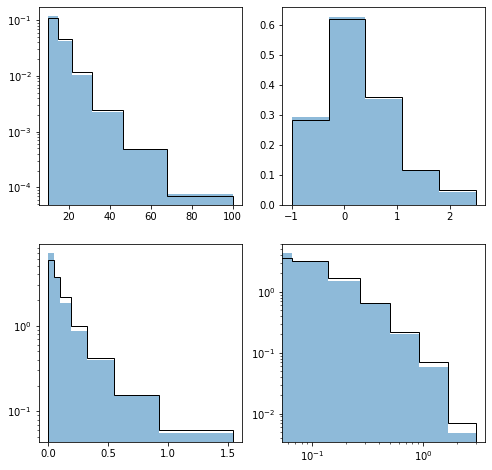

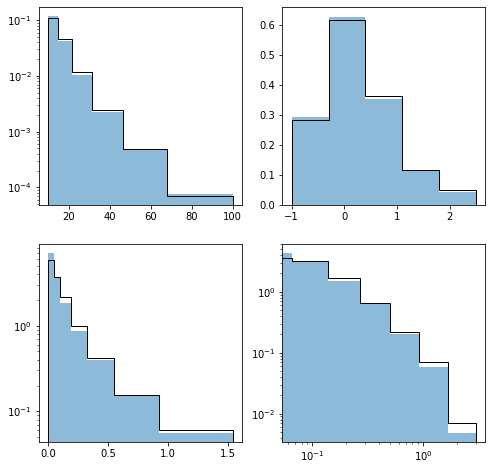

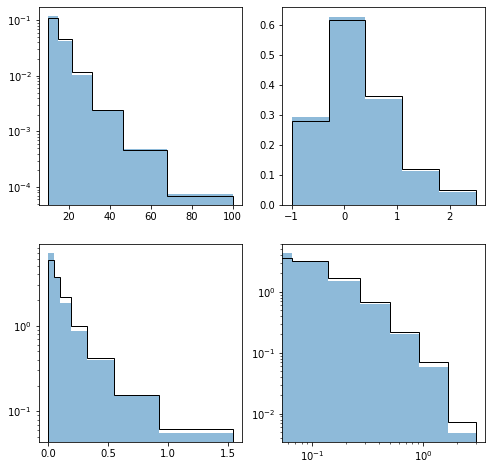

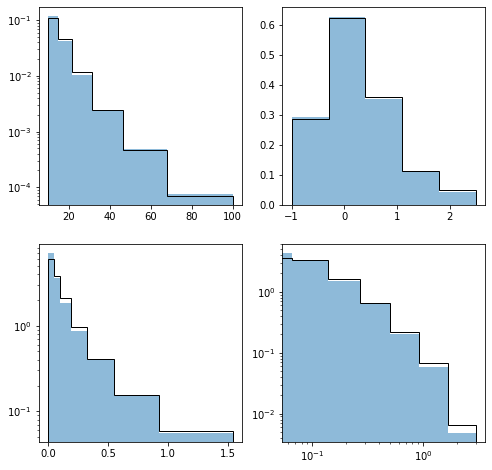

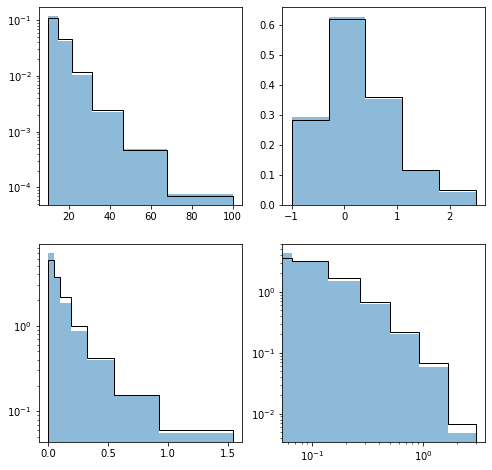

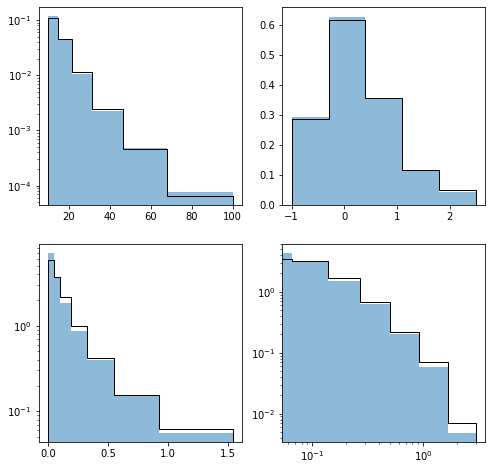

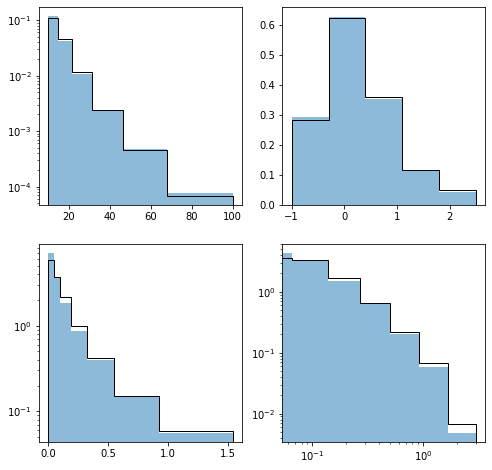

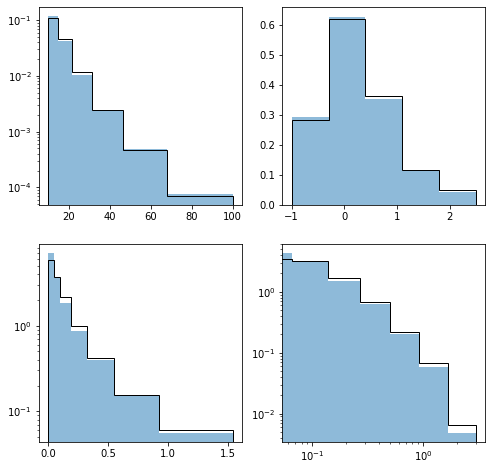

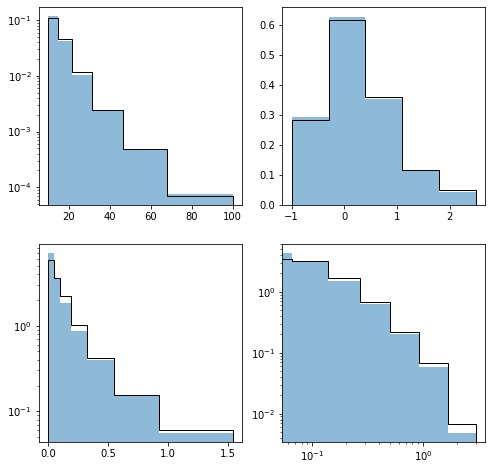

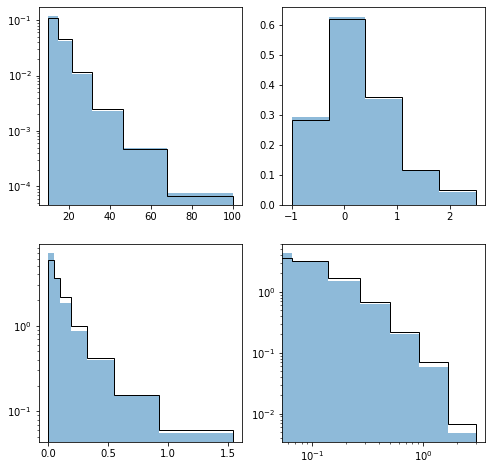

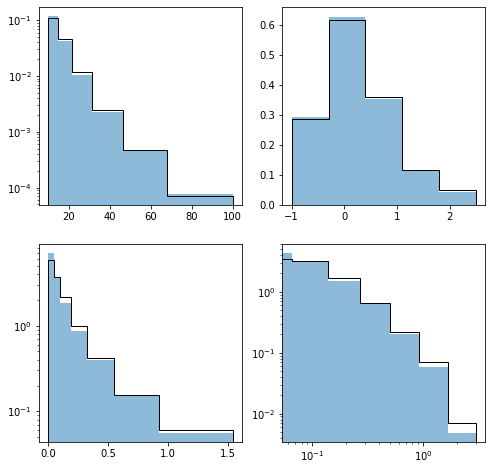

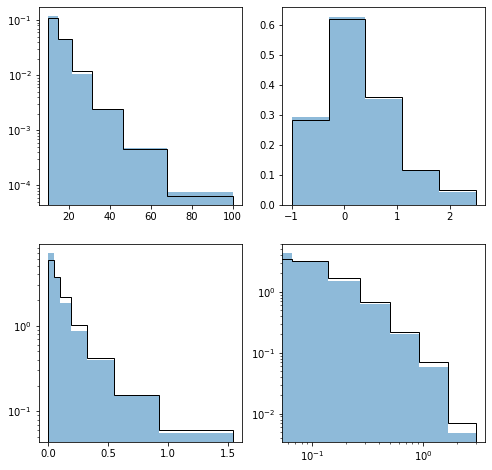

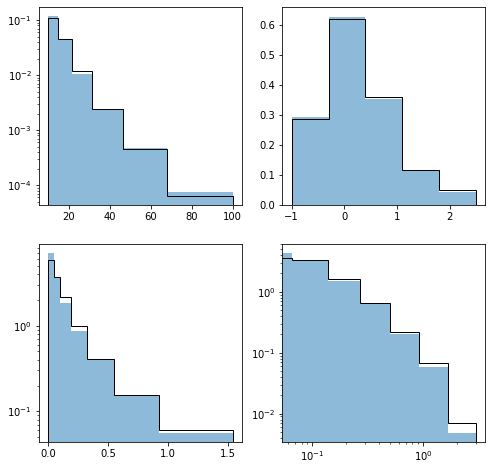

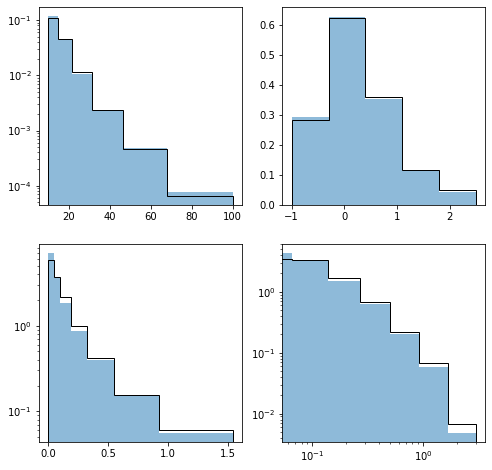

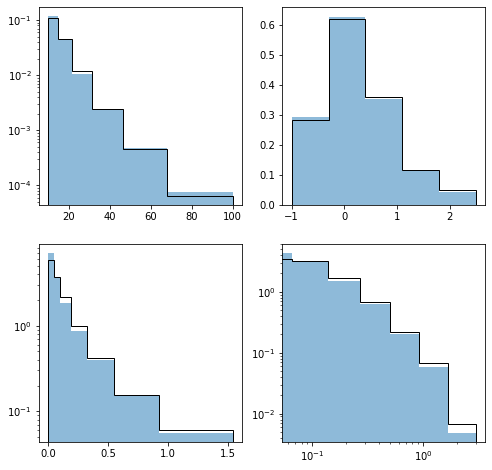

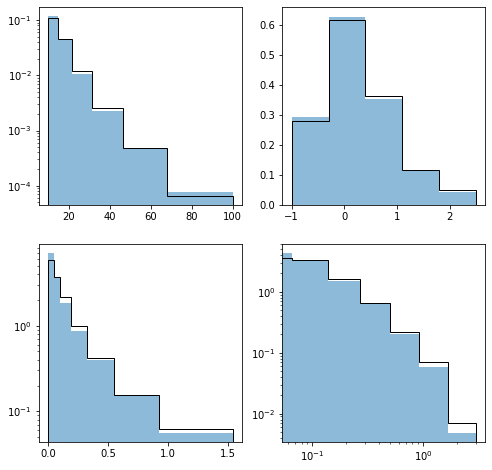

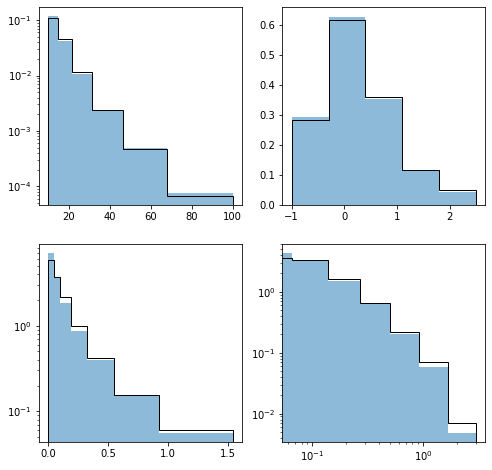

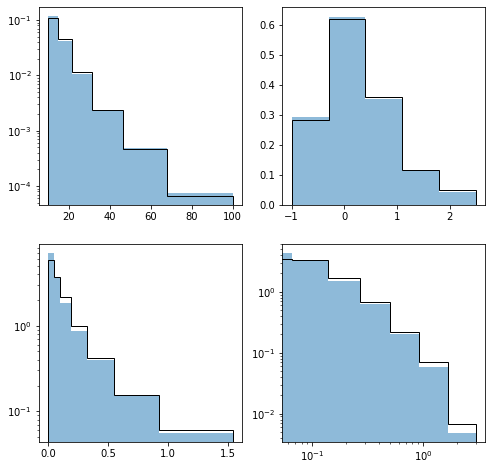

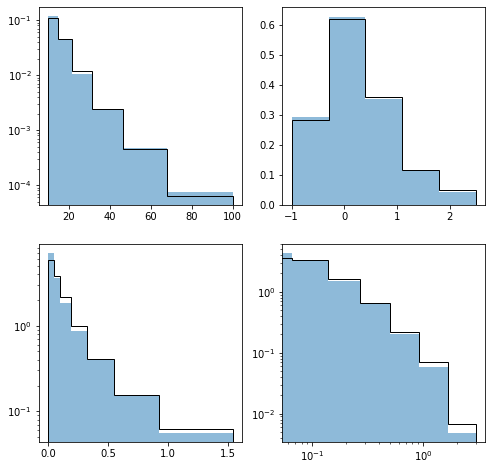

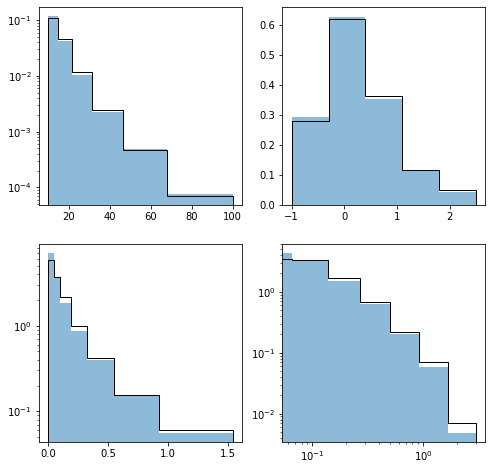

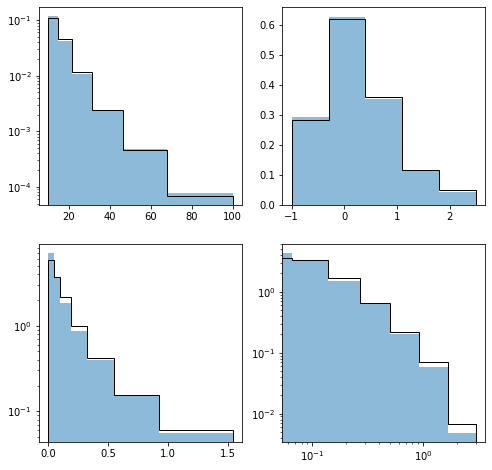

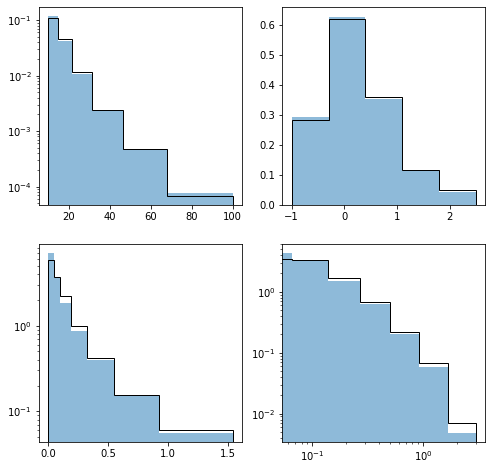

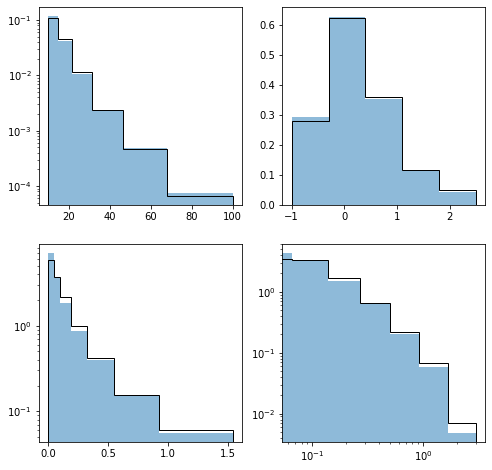

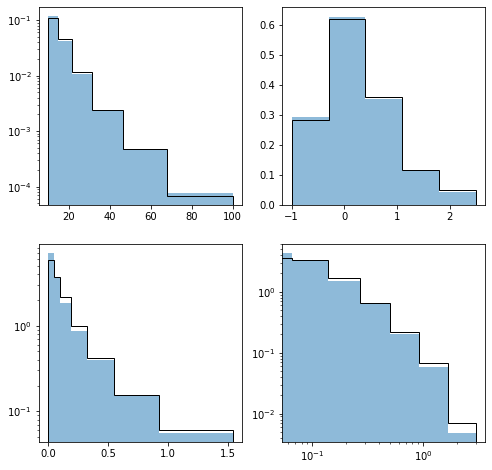

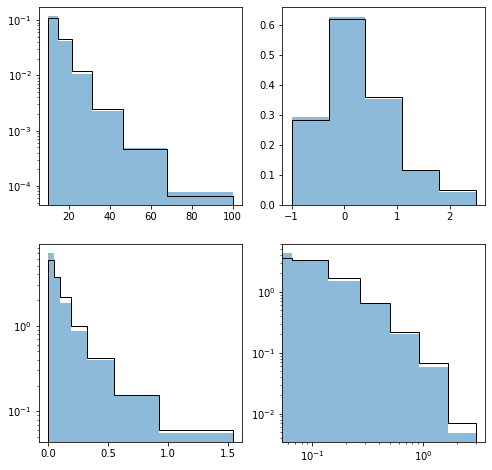

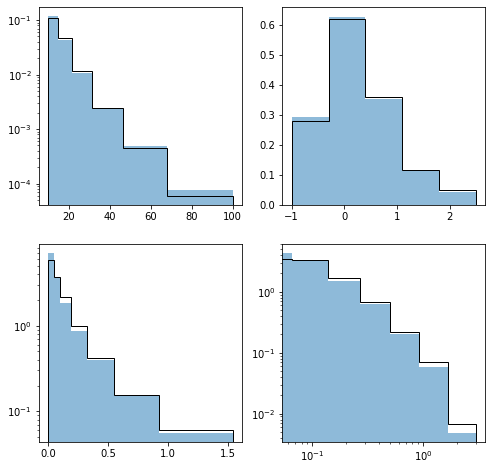

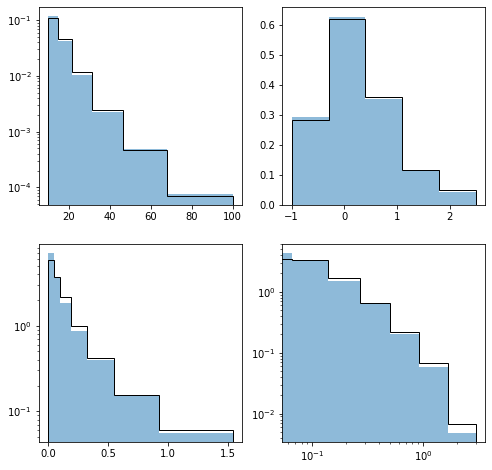

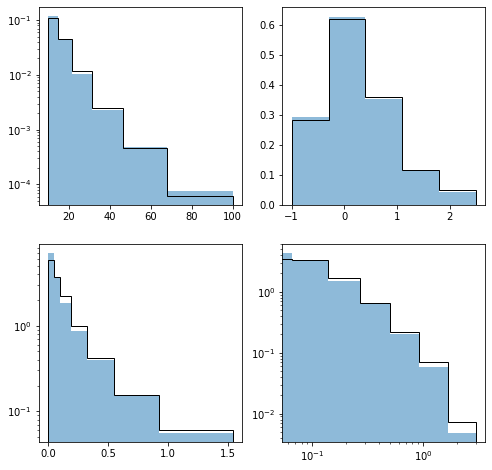

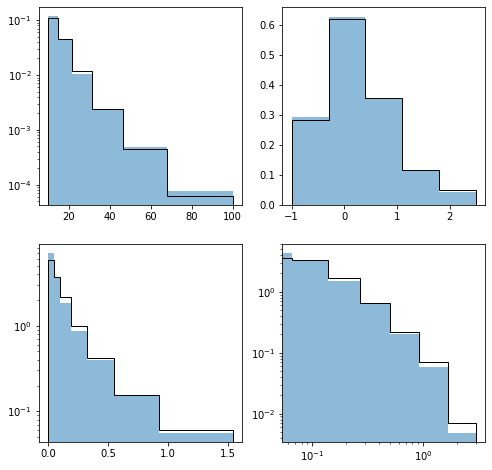

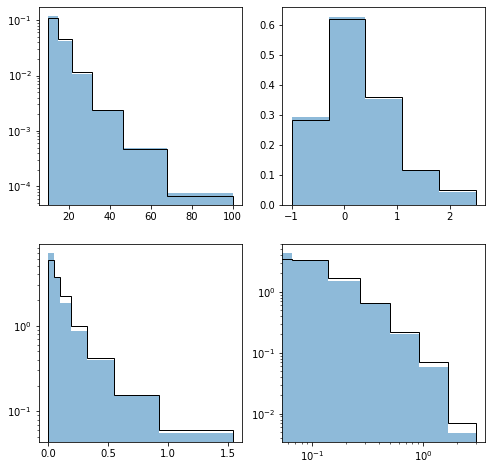

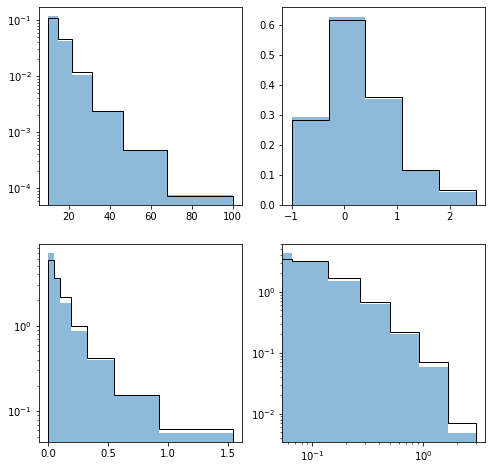

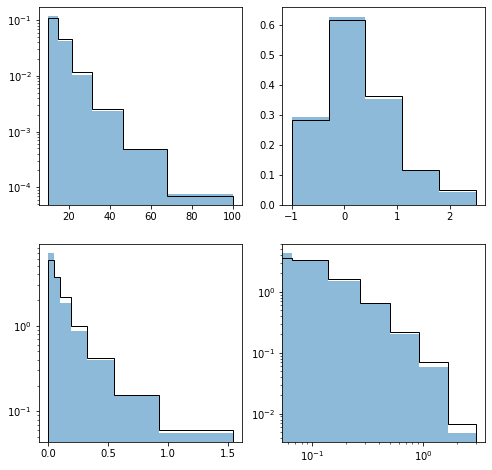

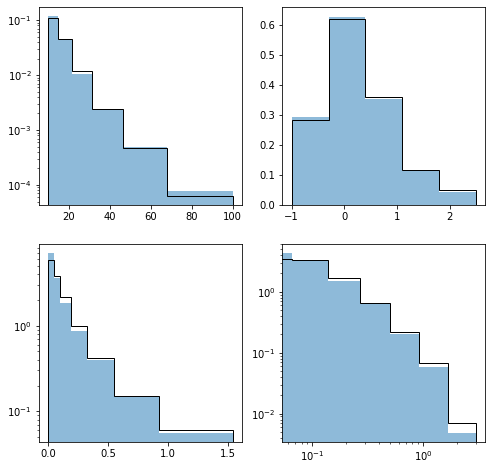

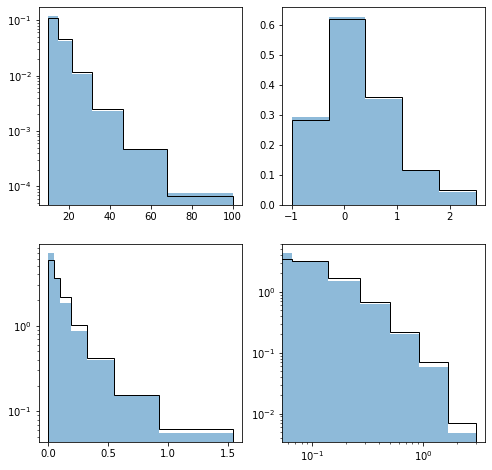

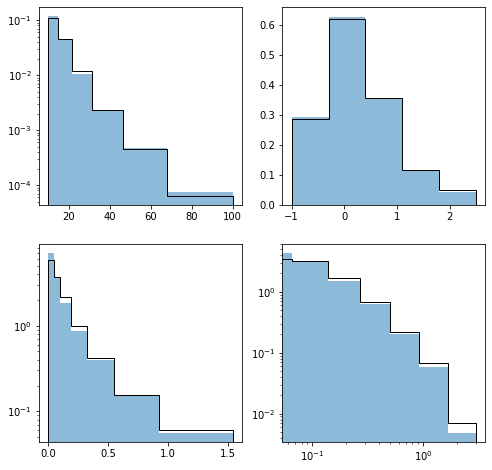

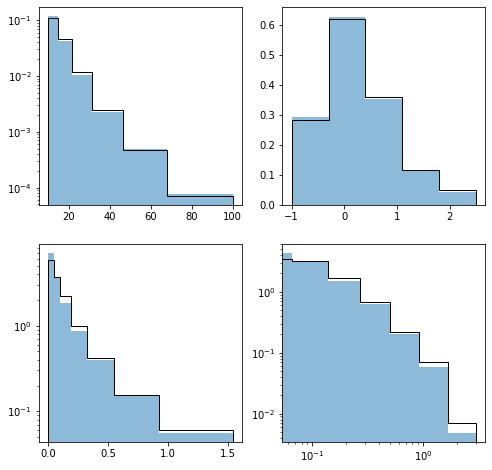

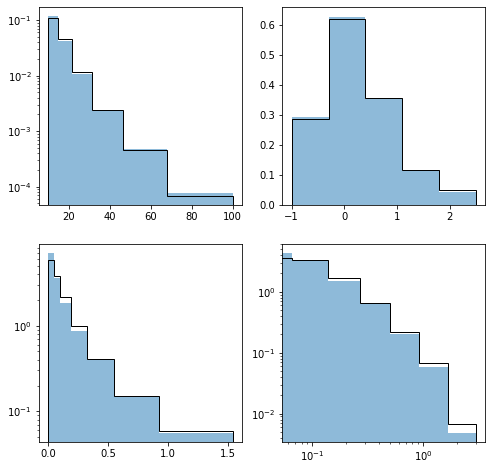

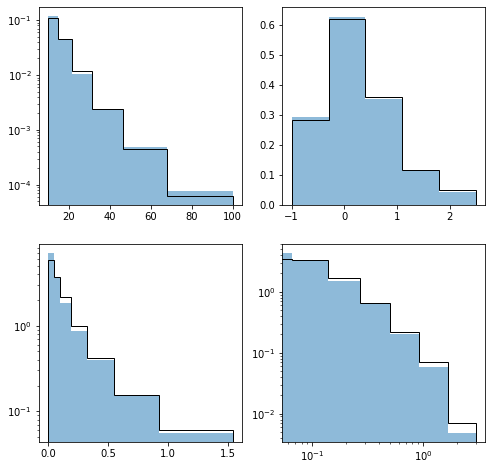

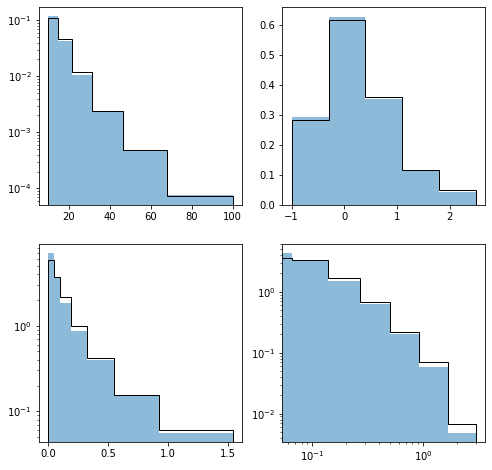

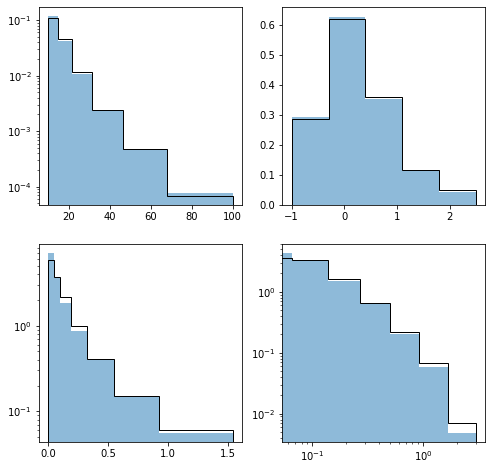

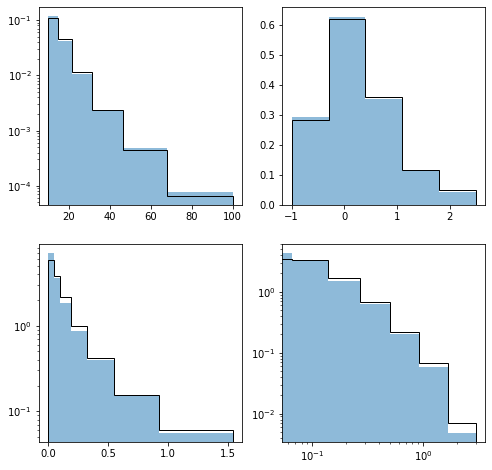

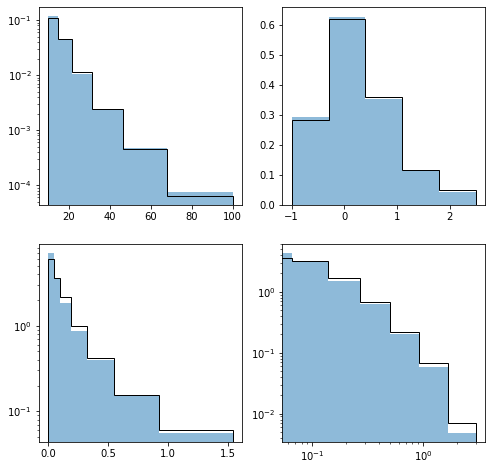

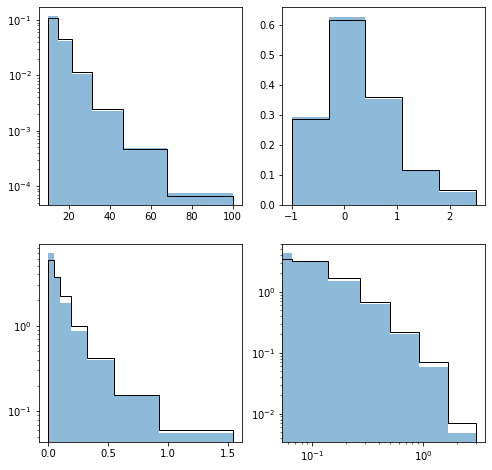

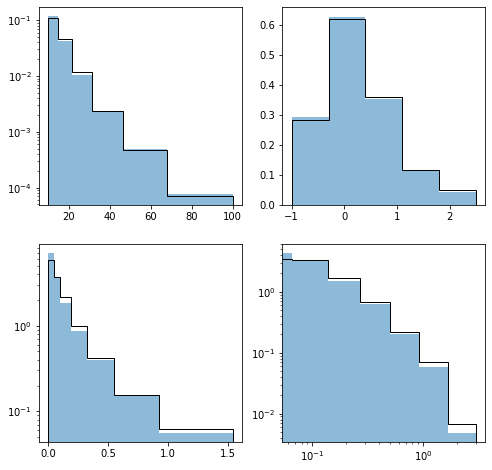

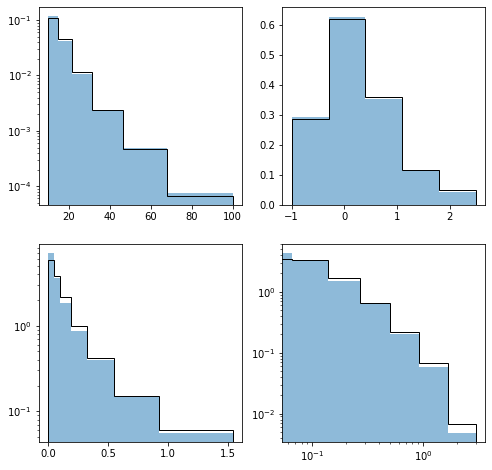

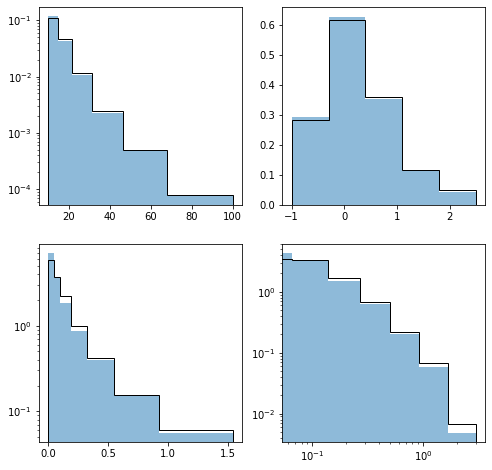

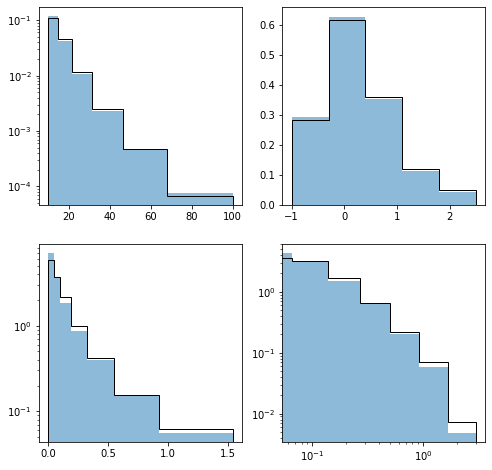

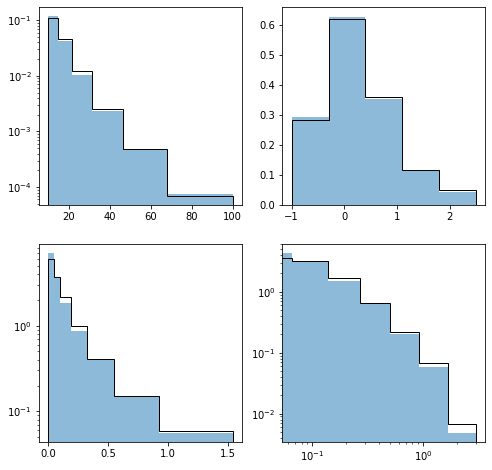

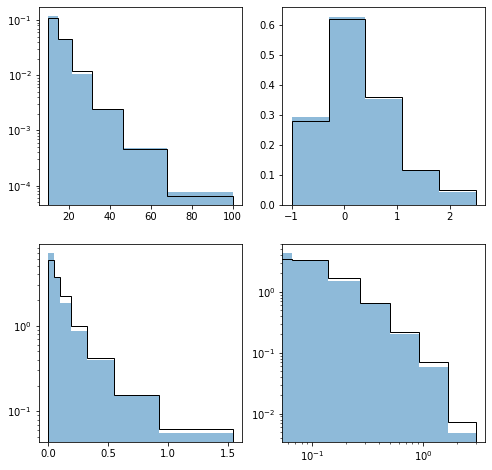

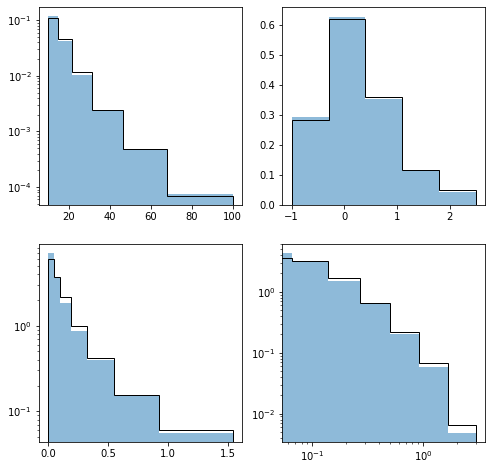

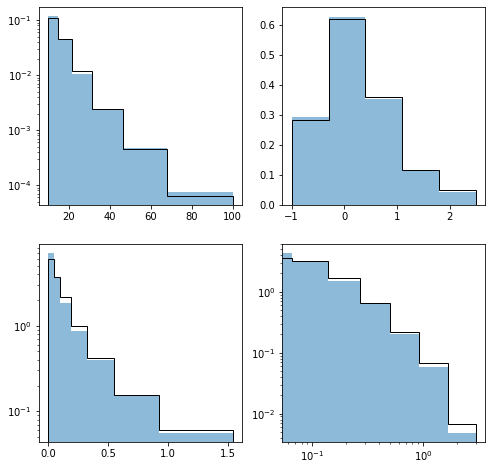

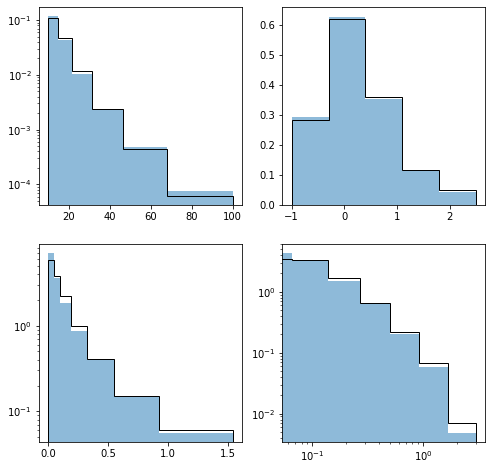

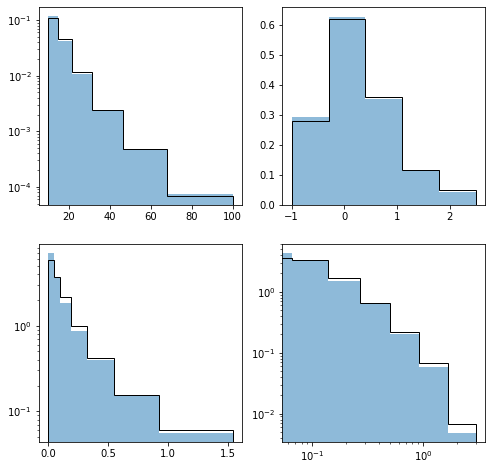

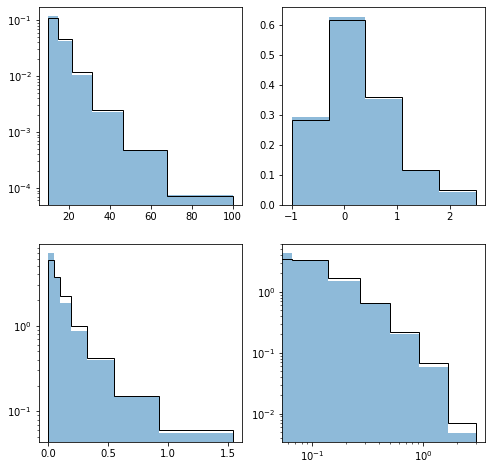

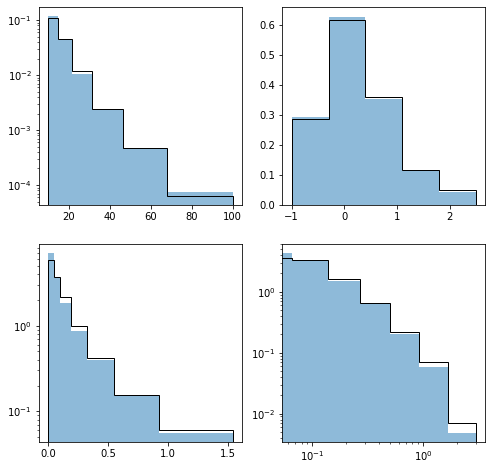

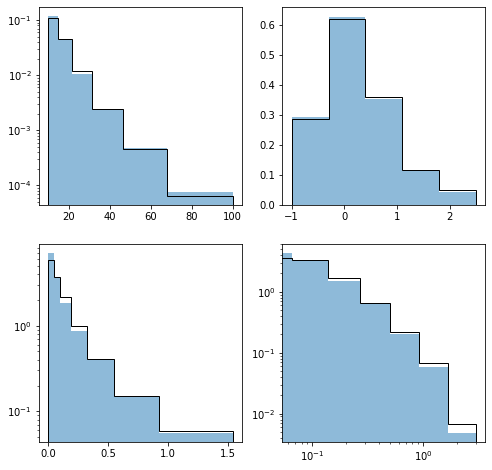

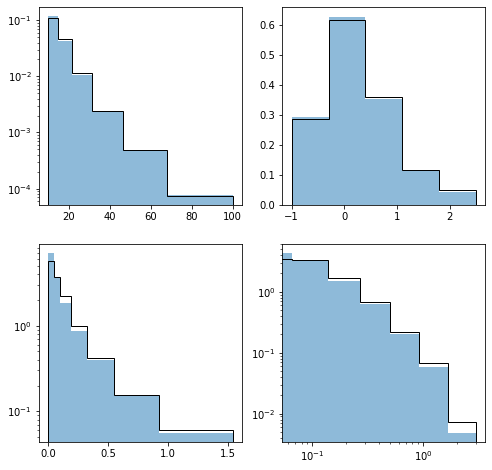

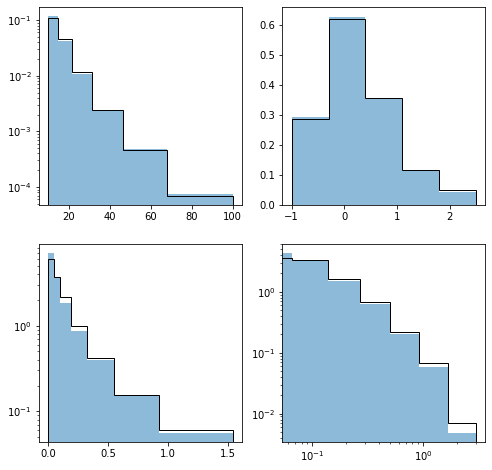

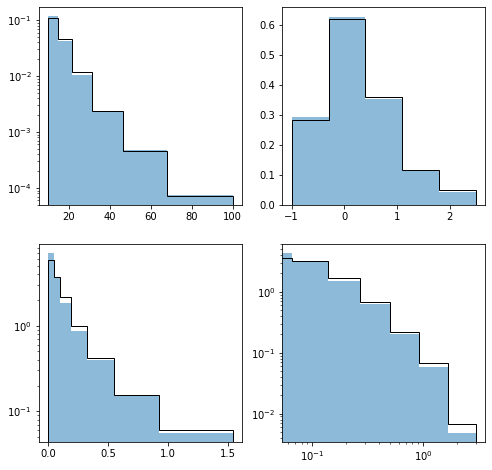

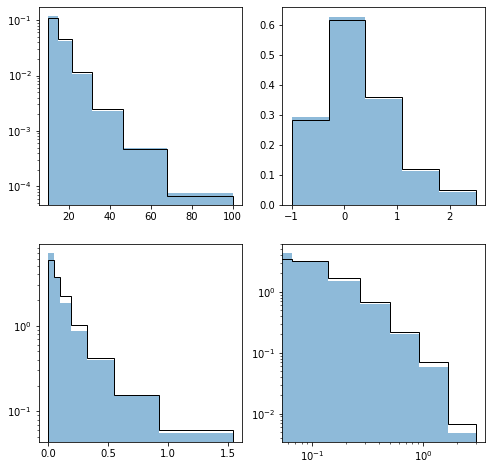

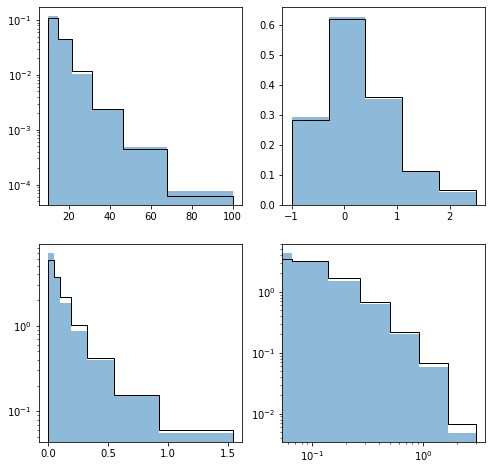

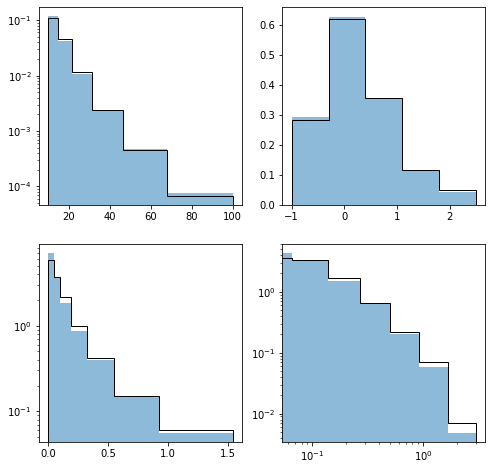

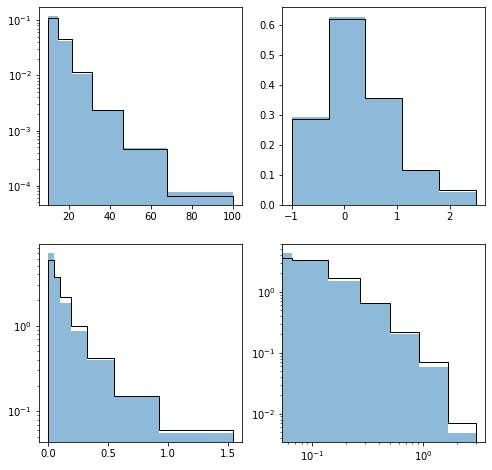

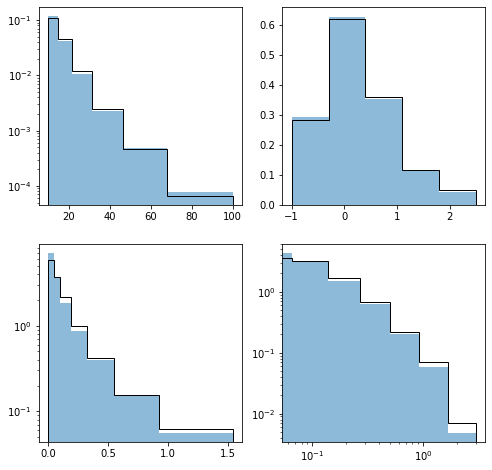

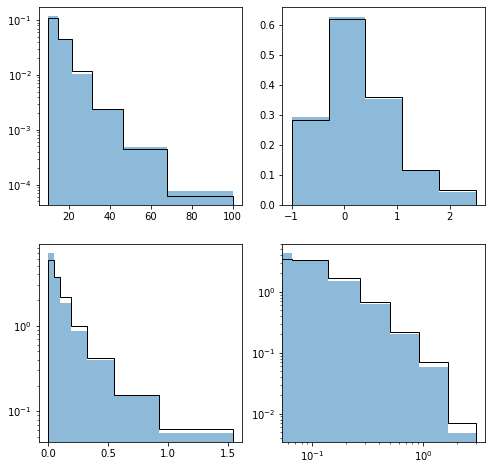

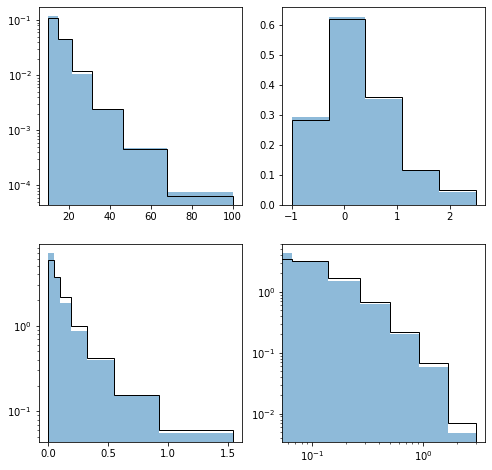

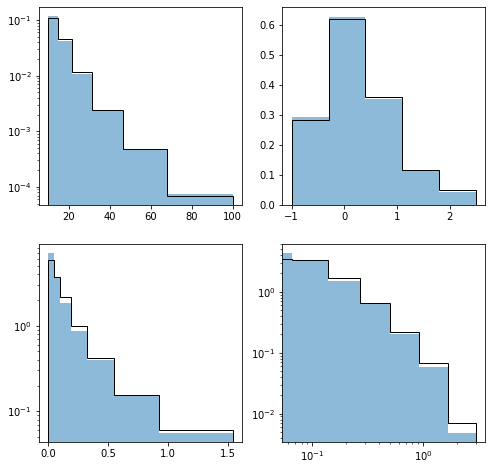

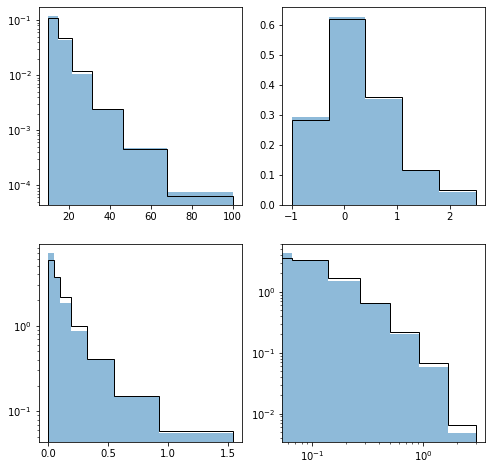

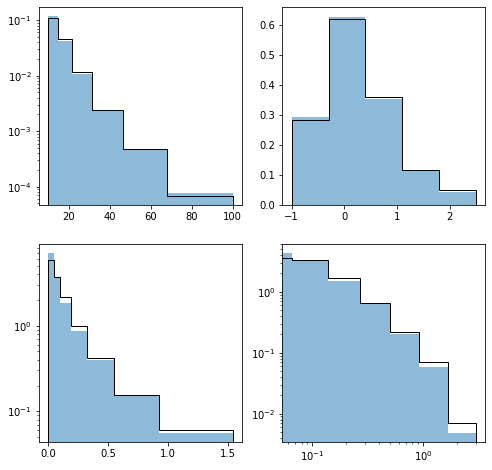

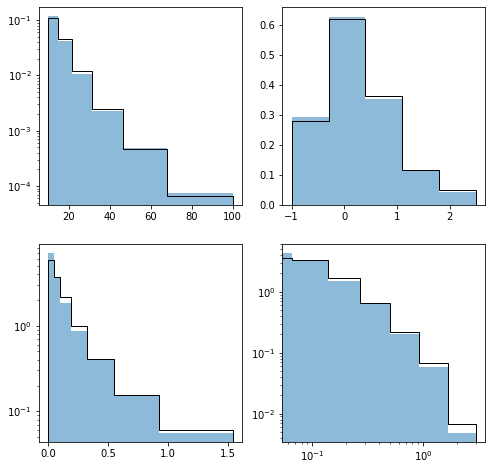

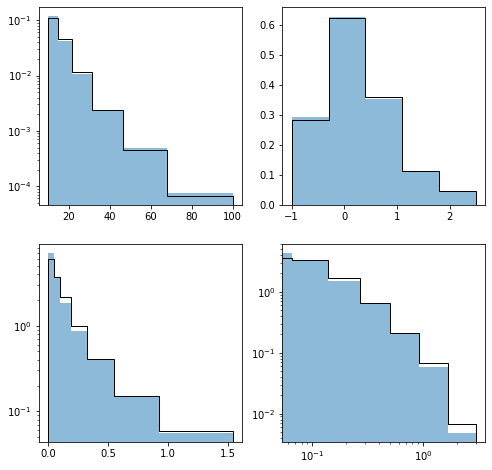

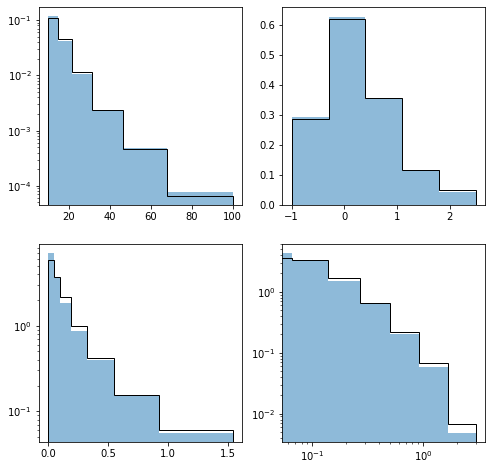

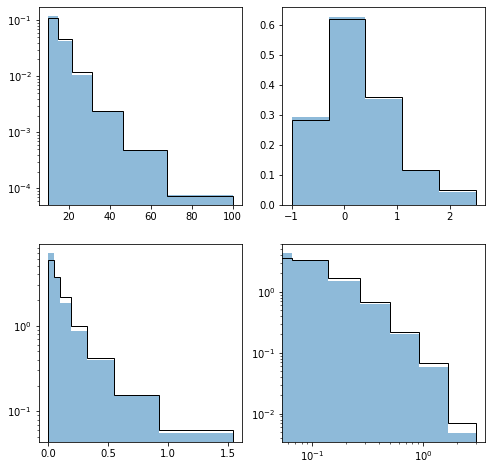

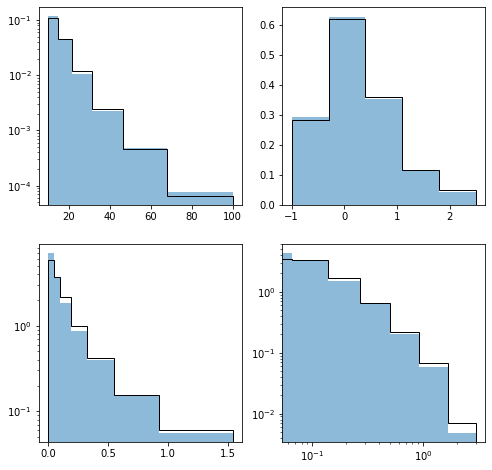

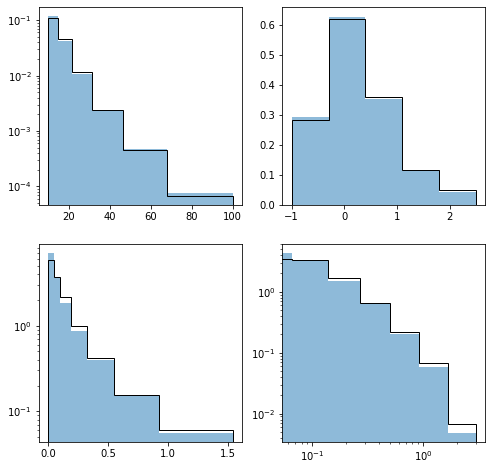

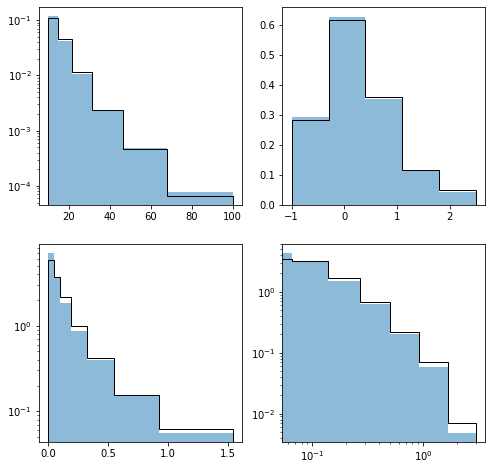

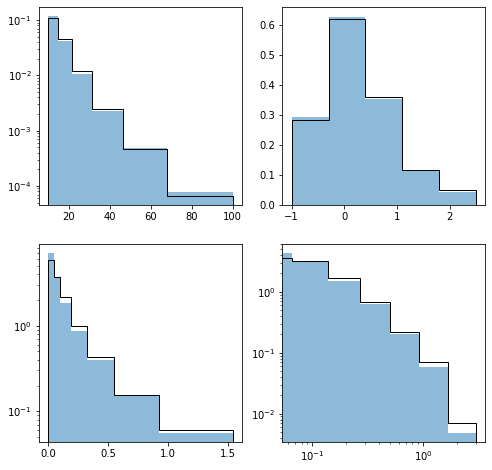

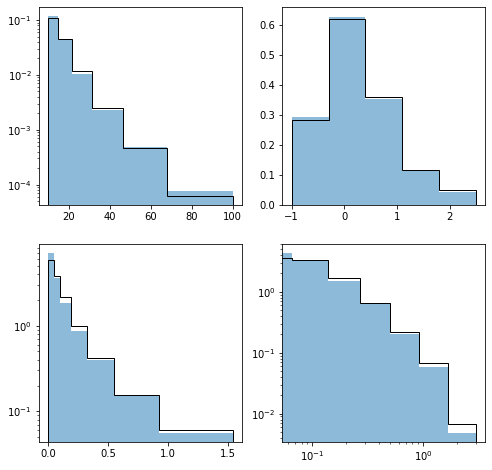

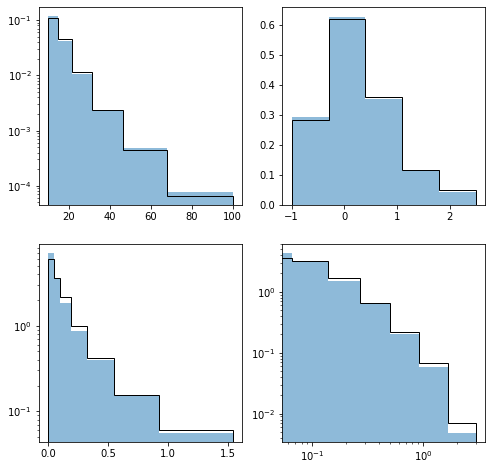

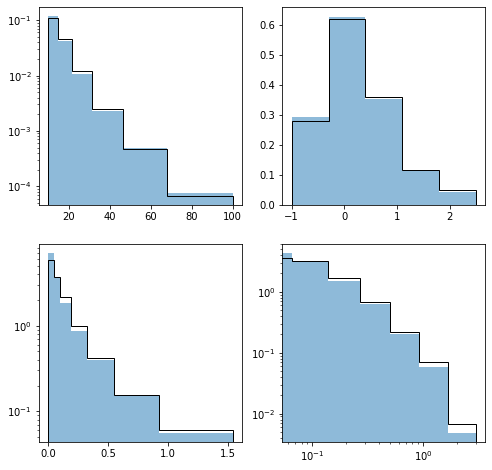

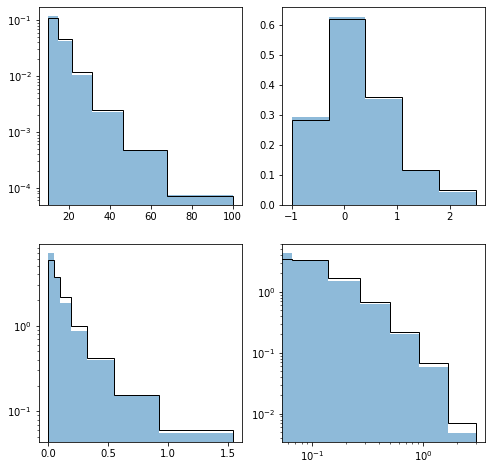

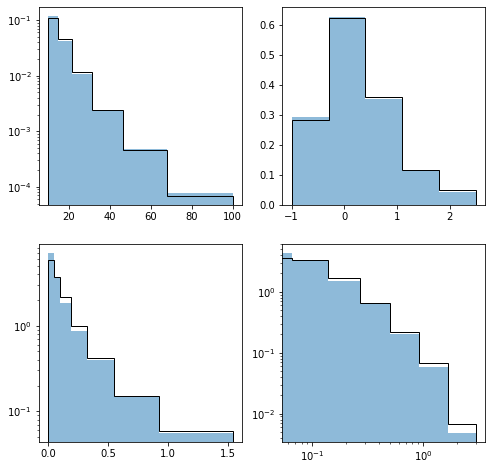

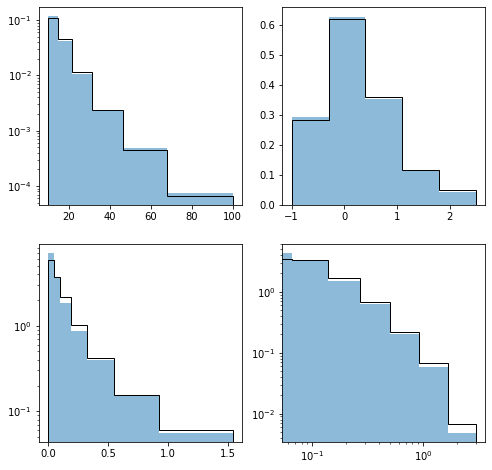

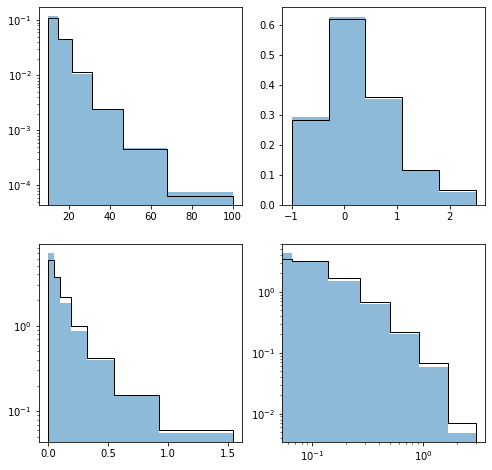

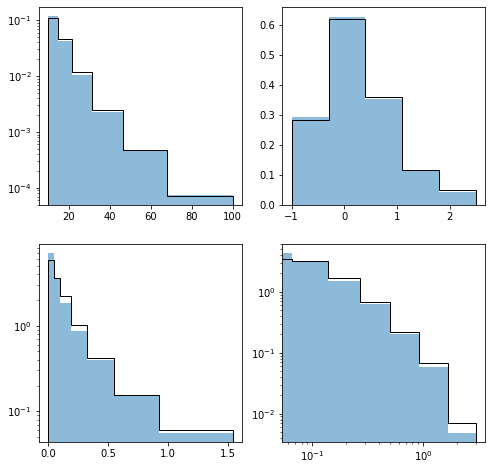

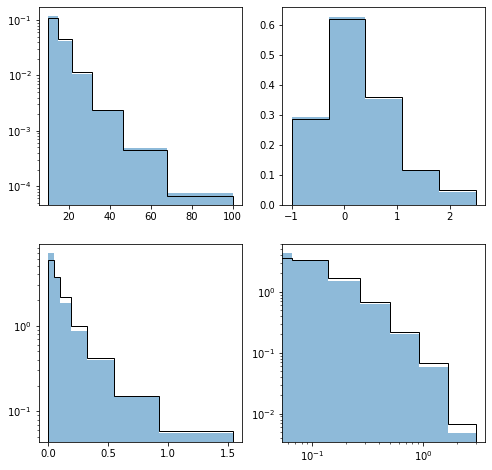

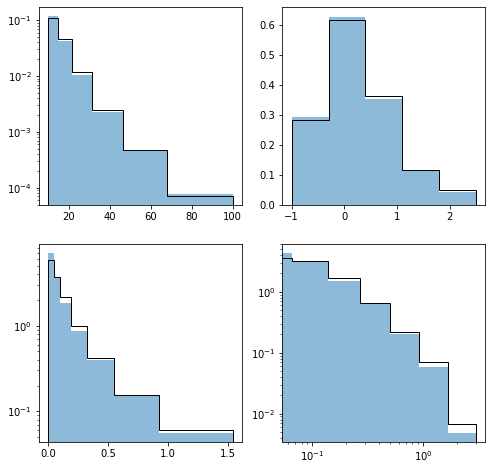

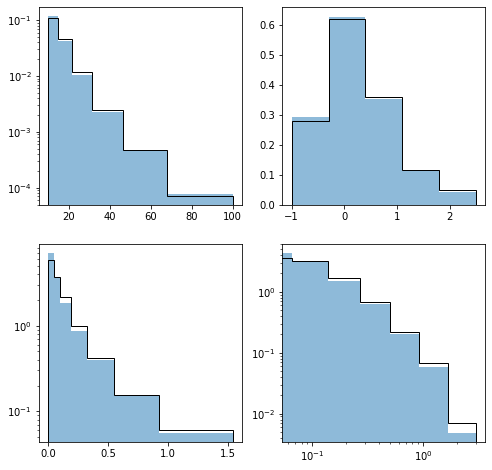

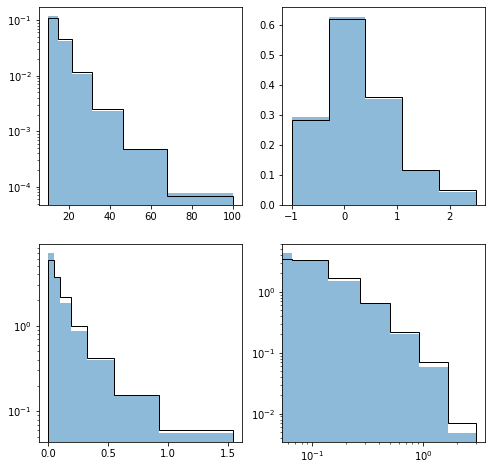

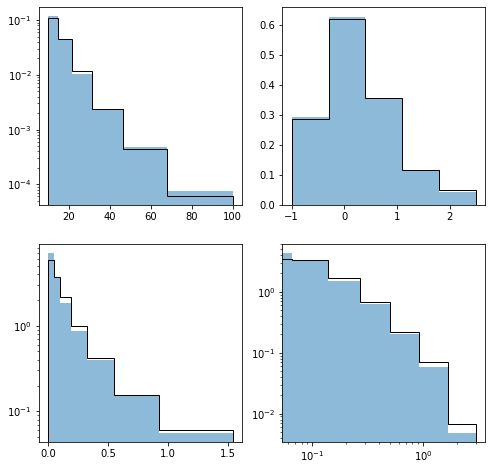

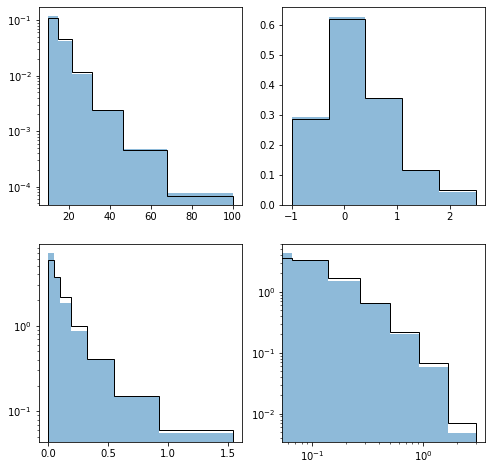

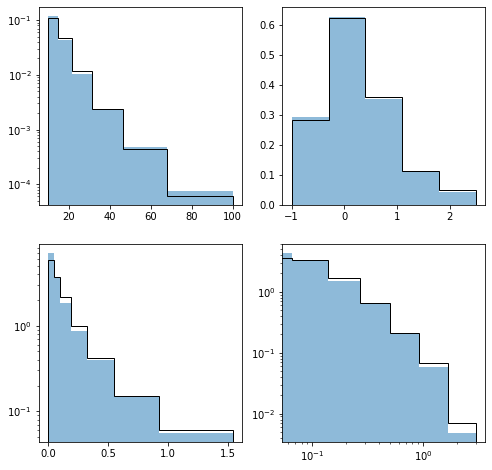

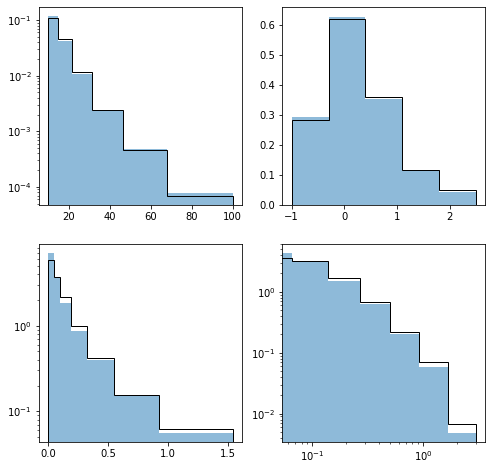

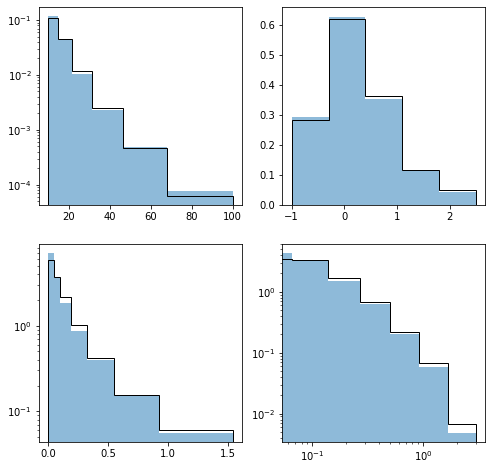

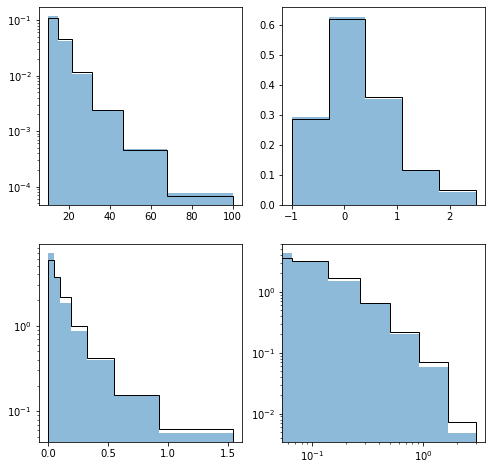

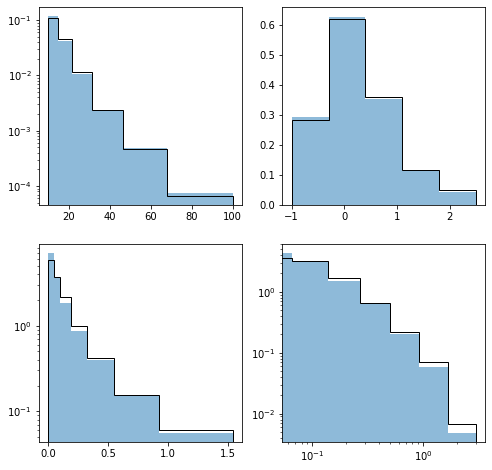

In [38]:
#Now, let's average the weights.
unfolded_vals_bootstraps = {}
for mc_i in range(1,100):
    print("on bootstrap = ",mc_i)

    mc = pd.read_pickle("datafiles/Rapgap_nominal.pkl")
    pass_reco = np.array(mc['pass_reco'])
    pass_truth = np.array(mc['pass_truth'])
    pass_fiducial = np.array(mc['pass_fiducial'])
    
    ww0 = np.load("/data0/bpnachman/H1/stat"+str(mc_i)+"_Rapgap_nominal_b0_i4_s1.npy")
    ww1 = np.load("/data0/bpnachman/H1/stat"+str(mc_i)+"_Rapgap_nominal_b1_i4_s1.npy")
    ww2 = np.load("/data0/bpnachman/H1/stat"+str(mc_i)+"_Rapgap_nominal_b2_i4_s1.npy")
    ww3 = np.load("/data0/bpnachman/H1/stat"+str(mc_i)+"_Rapgap_nominal_b3_i4_s1.npy")
    ww4 = np.load("/data0/bpnachman/H1/stat"+str(mc_i)+"_Rapgap_nominal_b4_i4_s1.npy")
    ww = np.average([ww0,ww1,ww2,ww3,ww4],axis=0)
    
    theta0_G = mc[['genjet_pt','genjet_eta','genjet_dphi','genjet_qtnorm']].to_numpy()
    weights_MC_sim = mc['wgt']
        
    fig , ax = plt.subplots(2,2,figsize=(8,8))
    ax = ax.flatten()
    for i in range(4):
        ax[i].hist(theta0_G[pass_fiducial==1][:,i],bins=bins[i],weights=weights_MC_sim[pass_fiducial==1],density=True,alpha=0.5)
        unfolded_vals_bootstraps[mc_i,i],_,_ = ax[i].hist(theta0_G[pass_fiducial==1][:,i],bins=bins[i],weights=ww[pass_fiducial==1],density=True,histtype="step",color="black")
        if (dologx[i]):
            ax[i].set_xscale('log')
        if (dology[i]):
            ax[i].set_yscale('log')

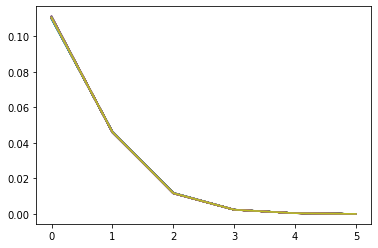

In [40]:
for i in range(1,100):
    plt.plot(unfolded_vals_bootstraps[i,0])

In [39]:
for mykey in unfolded_vals_bootstraps.keys():
    np.save("outputfiles/boostrapuncerts_unfolded_histos_o"+str(mykey[1])+"_s"+str(mykey[0]),unfolded_vals_bootstraps[mykey])